## SQL Alchemy 
#### 공식사이트 : http://www.sqlalchemy.org/
#### 참조사이트(추천) : http://docs.sqlalchemy.org/en/latest/orm/tutorial.html#version-check
#### 플라스크 확장판 : http://flask-sqlalchemy.pocoo.org/2.3/

### SQL Alchemy란? 
* SQLAlchemy는 파이썬 기반 데이터베이스 관리를 지원하는 프레임워크
* 간결한 문법으로 쿼리 가능
* SQLite뿐만 아니라 MY SQL 등 다양한 DB를 표준 파이썬 코드로 지원

### 설치

In [1]:
!pip install sqlalchemy

In [2]:
# 버젼 체크
import sqlalchemy
sqlalchemy.__version__

'1.1.5'

---
### 초기 접속 환경 세팅(매우 중요~!!! )
---

In [1]:
# 엔진 생성
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:', echo=True)   # 인메모리
# engine = create_engine('sqlite:///C:\path', echo=True)  # 윈도우 하드 공간
# engine = create_engine('sqlite:///path', echo=True)     # 리눅스 하드 공간

In [2]:
# SQLAlchemy - base class 선언
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

In [3]:
# 사용자 클래스 생성
from sqlalchemy import Column, Integer, String, Integer, Float, Numeric, Time, DateTime

class User(Base):                                  # -> 클래스명
    __tablename__ = 'users'                        # -> 실제 생성되는 테이블명
    id = Column(Integer, primary_key=True)         # -> 테이블 컬럼 정의
    name = Column(String)
    fullname = Column(String)
    password = Column(String)
    
    def __repr__(self):
        return "<User(name='%s', fullname='%s', password='%s')>" % (
                self.name, self.fullname, self.password)

In [8]:
# 테이블 속성 조사
User.__table__

Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), Column('password', String(), table=<users>), schema=None)

In [4]:
# 테이블을 물리적으로 생성한다. (기존 테이블 생성되어 있다면 테이블에 접속)
Base.metadata.create_all(engine)

2018-06-08 14:17:09,626 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-06-08 14:17:09,639 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:17:09,642 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-06-08 14:17:09,644 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:17:09,646 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("users")
2018-06-08 14:17:09,647 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:17:09,649 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE users (
	id INTEGER NOT NULL, 
	name VARCHAR, 
	fullname VARCHAR, 
	password VARCHAR, 
	PRIMARY KEY (id)
)


2018-06-08 14:17:09,650 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:17:09,652 INFO sqlalchemy.engine.base.Engine COMMIT


In [5]:
# 세션 만들기 
from sqlalchemy.orm import sessionmaker
Session = sessionmaker(bind=engine)
session = Session()

--- 
### 데이터 생성 및 쿼리 예시
---

In [6]:
# 값 생성하기(create an instance)
ed_user = User(name='ed', fullname='Ed Jones', password='12345')
ed_user.name
ed_user.password
str(ed_user.id)

'None'

In [7]:
# 값 추가/업데이트 하기... 1건
session.add(ed_user)

# name으로 쿼리해보자~! 
our_user = session.query(User).filter_by(name='ed').first()  # first() -> 최초 1건만
our_user

2018-06-08 14:17:18,900 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-06-08 14:17:18,903 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname, password) VALUES (?, ?, ?)
2018-06-08 14:17:18,905 INFO sqlalchemy.engine.base.Engine ('ed', 'Ed Jones', '12345')
2018-06-08 14:17:18,907 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name = ?
 LIMIT ? OFFSET ?
2018-06-08 14:17:18,909 INFO sqlalchemy.engine.base.Engine ('ed', 1, 0)


<User(name='ed', fullname='Ed Jones', password='12345')>

In [8]:
# 값 추가/업데이트 하기... 여러 건
session.add_all([
     User(name='wendy', fullname='Wendy Williams', password='foobar'),
     User(name='mary', fullname='Mary Contrary', password='xxg527'),
     User(name='fred', fullname='Fred Flinstone', password='blah')])

In [9]:
# 세션 실행 : 값 데이터베이스에 업로드
session.commit()

2018-06-08 14:17:22,438 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname, password) VALUES (?, ?, ?)
2018-06-08 14:17:22,440 INFO sqlalchemy.engine.base.Engine ('wendy', 'Wendy Williams', 'foobar')
2018-06-08 14:17:22,441 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname, password) VALUES (?, ?, ?)
2018-06-08 14:17:22,442 INFO sqlalchemy.engine.base.Engine ('mary', 'Mary Contrary', 'xxg527')
2018-06-08 14:17:22,443 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname, password) VALUES (?, ?, ?)
2018-06-08 14:17:22,445 INFO sqlalchemy.engine.base.Engine ('fred', 'Fred Flinstone', 'blah')
2018-06-08 14:17:22,446 INFO sqlalchemy.engine.base.Engine COMMIT


---
### 쿼리 예시 모음
---

In [15]:
### 건수 체크
session.query(User).count()

2018-06-08 14:20:28,564 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users) AS anon_1
2018-06-08 14:20:28,566 INFO sqlalchemy.engine.base.Engine ()


4

In [10]:
### 간단 쿼리
session.query(User).all()

2018-06-08 14:17:45,814 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-06-08 14:17:45,816 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users
2018-06-08 14:17:45,817 INFO sqlalchemy.engine.base.Engine ()


[<User(name='ed', fullname='Ed Jones', password='12345')>,
 <User(name='wendy', fullname='Wendy Williams', password='foobar')>,
 <User(name='mary', fullname='Mary Contrary', password='xxg527')>,
 <User(name='fred', fullname='Fred Flinstone', password='blah')>]

In [12]:
# 첫번째 쿼리 결과만
session.query(User).first()

2018-06-08 14:19:09,343 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users
 LIMIT ? OFFSET ?
2018-06-08 14:19:09,345 INFO sqlalchemy.engine.base.Engine (1, 0)


<User(name='ed', fullname='Ed Jones', password='12345')>

In [24]:
# 두번째 관측치
session.query(User).get(2)

<User(name='wendy', fullname='Wendy Williams', password='foobar')>

In [14]:
# order_by로 정렬하기
session.query(User).order_by(User.fullname).all()

2018-06-08 14:19:52,112 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users ORDER BY users.fullname
2018-06-08 14:19:52,114 INFO sqlalchemy.engine.base.Engine ()


[<User(name='ed', fullname='Ed Jones', password='12345')>,
 <User(name='fred', fullname='Fred Flinstone', password='blah')>,
 <User(name='mary', fullname='Mary Contrary', password='xxg527')>,
 <User(name='wendy', fullname='Wendy Williams', password='foobar')>]

In [15]:
# order_by로 정렬하기
for i in session.query(User).order_by(User.id):
    print(i.name, i.fullname)

2018-06-04 15:22:14,945 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2018-06-04 15:22:14,947 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users ORDER BY users.id
2018-06-04 15:22:14,953 INFO sqlalchemy.engine.base.Engine ()
ed Ed Jones
wendy Wendy Williams
mary Mary Contrary
fred Fred Flinstone


In [16]:
### 필터
session.query(User).filter(User.name.like('%ed')).all()

2018-06-08 14:20:55,539 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name LIKE ?
2018-06-08 14:20:55,541 INFO sqlalchemy.engine.base.Engine ('%ed',)


[<User(name='ed', fullname='Ed Jones', password='12345')>,
 <User(name='fred', fullname='Fred Flinstone', password='blah')>]

In [16]:
# for문 - 클래스 컬럼으로 쿼리하기
for name, fullname in session.query(User.name, User.fullname):
    print(name, fullname)

2018-06-04 15:22:50,926 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name, users.fullname AS users_fullname 
FROM users
2018-06-04 15:22:50,928 INFO sqlalchemy.engine.base.Engine ()
ed Ed Jones
wendy Wendy Williams
mary Mary Contrary
fred Fred Flinstone


In [17]:
# for문 - all()함수로 모든 데이터 쿼리하기
for row in session.query(User, User.name).all():
    print(row.User, row.name)

2018-06-04 15:23:09,711 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users
2018-06-04 15:23:09,712 INFO sqlalchemy.engine.base.Engine ()
<User(name='ed', fullname='Ed Jones', password='12345')> ed
<User(name='wendy', fullname='Wendy Williams', password='foobar')> wendy
<User(name='mary', fullname='Mary Contrary', password='xxg527')> mary
<User(name='fred', fullname='Fred Flinstone', password='blah')> fred


In [18]:
for row in session.query(User.name.label('name_label')).all():
    print(row.name_label)

2018-06-04 15:23:18,581 INFO sqlalchemy.engine.base.Engine SELECT users.name AS name_label 
FROM users
2018-06-04 15:23:18,583 INFO sqlalchemy.engine.base.Engine ()
ed
wendy
mary
fred


In [19]:
# for문 - 리스트로 한번에 한줄로 내리기 
[ row.name_label for row in session.query(User.name.label('name_label')).all() ]

2018-06-04 15:23:27,417 INFO sqlalchemy.engine.base.Engine SELECT users.name AS name_label 
FROM users
2018-06-04 15:23:27,422 INFO sqlalchemy.engine.base.Engine ()


['ed', 'wendy', 'mary', 'fred']

In [21]:
# for문 - 슬라이싱
for u in session.query(User).order_by(User.id)[1:3]:
    print(u)

2018-06-04 15:24:04,617 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users ORDER BY users.id
 LIMIT ? OFFSET ?
2018-06-04 15:24:04,619 INFO sqlalchemy.engine.base.Engine (2, 1)
<User(name='wendy', fullname='Wendy Williams', password='foobar')>
<User(name='mary', fullname='Mary Contrary', password='xxg527')>


---
### 쿼리 필터링 심도 깊게
---

---
### 우선 filter와 filter_by의 차이를 정확하게 알고있자~!
* 출처 : https://goo.gl/6B7CmK

filter_by is used for simple queries on the column names using regular kwargs, like

**db.users.filter_by(name='Joe')**

The same can be accomplished with filter, not using kwargs, but instead using the '==' equality operator, 
which has been overloaded on the db.users.name object:

**db.users.filter(db.users.name=='Joe')**

You can also write **more powerful** queries using filter, such as expressions like:

**db.users.filter(or_(db.users.name=='Ryan', db.users.country=='England'))**

---

In [22]:
# 콤마(name,) -> 스트링으로 넘어온다!!!
for name, in session.query(User.name).filter_by(fullname='Ed Jones'):
    print(name)

2018-06-04 15:24:53,583 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.fullname = ?
2018-06-04 15:24:53,585 INFO sqlalchemy.engine.base.Engine ('Ed Jones',)
ed


In [23]:
# 콤마(name,)없는 경우
for name in session.query(User.name).filter_by(fullname='Ed Jones'):  
    print(name)

2018-06-04 15:25:02,859 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.fullname = ?
2018-06-04 15:25:02,862 INFO sqlalchemy.engine.base.Engine ('Ed Jones',)
('ed',)


In [24]:
# in_ 함수로 여러 값 조건 걸기
for name, in session.query(User.name).filter(User.name.in_(['ed', 'wendy','jack'])):
    print(name)

2018-06-04 15:25:29,915 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.name IN (?, ?, ?)
2018-06-04 15:25:29,917 INFO sqlalchemy.engine.base.Engine ('ed', 'wendy', 'jack')
ed
wendy


In [25]:
# 두 개 조건 걸기
for name, in session.query(User.name).filter(User.name=='ed', User.fullname=='Ed Jones'):
    print(name)

2018-06-04 15:25:37,872 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.name = ? AND users.fullname = ?
2018-06-04 15:25:37,874 INFO sqlalchemy.engine.base.Engine ('ed', 'Ed Jones')
ed


In [26]:
# and, or 조건으로 데이터 필터링
from sqlalchemy import and_, or_
for name, in session.query(User.name).filter(or_(User.name=='ed', User.name=='hanhoman')):
    print(name)

2018-06-04 15:26:07,926 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name 
FROM users 
WHERE users.name = ? OR users.name = ?
2018-06-04 15:26:07,929 INFO sqlalchemy.engine.base.Engine ('ed', 'hanhoman')
ed


In [27]:
# like함수  
query = session.query(User).filter(User.name.like('%ed')).order_by(User.id)
query.all()   

2018-06-04 15:26:41,645 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name LIKE ? ORDER BY users.id
2018-06-04 15:26:41,646 INFO sqlalchemy.engine.base.Engine ('%ed',)


[<User(name='ed', fullname='Ed Jones', password='12345')>,
 <User(name='fred', fullname='Fred Flinstone', password='blah')>]

In [29]:
# 중복 데이터가 있다면 첫번째만 쿼리
# 없다면 에러 메시지 ...
query.one()   

2018-06-04 15:27:02,382 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name LIKE ? ORDER BY users.id
2018-06-04 15:27:02,384 INFO sqlalchemy.engine.base.Engine ('%ed',)


MultipleResultsFound: Multiple rows were found for one()

---
### 삭제
--- 

In [28]:
mary = session.query(User).filter_by(name='mary').first()
session.delete(mary)

session.query(User).all()

2018-06-08 14:31:08,054 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name = ?
 LIMIT ? OFFSET ?
2018-06-08 14:31:08,056 INFO sqlalchemy.engine.base.Engine ('mary', 1, 0)
2018-06-08 14:31:08,064 INFO sqlalchemy.engine.base.Engine DELETE FROM users WHERE users.id = ?
2018-06-08 14:31:08,066 INFO sqlalchemy.engine.base.Engine (3,)
2018-06-08 14:31:08,068 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users
2018-06-08 14:31:08,070 INFO sqlalchemy.engine.base.Engine ()


[<User(name='ed', fullname='Ed Jones', password='12345')>,
 <User(name='wendy', fullname='Wendy Williams', password='foobar')>,
 <User(name='fred', fullname='Fred Flinstone', password='blah')>]

---
### SQL도 날릴 수 있다
---

In [30]:
from sqlalchemy import text

session.query(User).from_statement(
                        text("SELECT * FROM users where name=:name")).\
                        params(name='ed').all()

2018-06-04 15:27:54,525 INFO sqlalchemy.engine.base.Engine SELECT * FROM users where name=?
2018-06-04 15:27:54,527 INFO sqlalchemy.engine.base.Engine ('ed',)


[<User(name='ed', fullname='Ed Jones', password='12345')>]

---
### 다른 테이블과의 관계
---

In [32]:
from sqlalchemy import ForeignKey
from sqlalchemy.orm import relationship

# 주소 클래스 하나 더 만들자
class Address(Base):
    __tablename__ = 'addresses'
    id = Column(Integer, primary_key=True)
    email_address = Column(String, nullable=False)
    user_id = Column(Integer, ForeignKey('users.id'))   # ForiegnKey에서  테이블 관계 지정
    
    user = relationship("User", back_populates="addresses")  # 클래스 관계 지정
    
    def __repr__(self):
        return "<Address(email_address='%s')>" % self.email_address

User.addresses = relationship(
   "Address", order_by=Address.id, back_populates="user")

Base.metadata.create_all(engine)    

2018-06-04 16:37:44,244 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("users")
2018-06-04 16:37:44,255 INFO sqlalchemy.engine.base.Engine ()
2018-06-04 16:37:44,257 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("addresses")
2018-06-04 16:37:44,258 INFO sqlalchemy.engine.base.Engine ()
2018-06-04 16:37:44,259 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE addresses (
	id INTEGER NOT NULL, 
	email_address VARCHAR NOT NULL, 
	user_id INTEGER, 
	PRIMARY KEY (id), 
	FOREIGN KEY(user_id) REFERENCES users (id)
)


2018-06-04 16:37:44,260 INFO sqlalchemy.engine.base.Engine ()
2018-06-04 16:37:44,262 INFO sqlalchemy.engine.base.Engine COMMIT


In [33]:
''' 여러 테이블로 놀아보자 '''
jack = User(name='jack', fullname='Jack Bean', password='gjffdd')

# 이메일 주소가 두 개인 샘플 만들기
jack.addresses = [
                Address(email_address='jack@google.com'),
                Address(email_address='j25@yahoo.com')]

print(jack.addresses[1])      # 두번째 이메일
print(jack.addresses[1].user) # 두번째 이메일 사용자

session.add(jack)
session.commit()  # jack은 User와 Address클래스에 모두 반영된다.

<Address(email_address='j25@yahoo.com')>
<User(name='jack', fullname='Jack Bean', password='gjffdd')>
2018-06-04 16:38:41,512 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname, password) VALUES (?, ?, ?)
2018-06-04 16:38:41,515 INFO sqlalchemy.engine.base.Engine ('jack', 'Jack Bean', 'gjffdd')
2018-06-04 16:38:41,517 INFO sqlalchemy.engine.base.Engine INSERT INTO addresses (email_address, user_id) VALUES (?, ?)
2018-06-04 16:38:41,519 INFO sqlalchemy.engine.base.Engine ('jack@google.com', 5)
2018-06-04 16:38:41,522 INFO sqlalchemy.engine.base.Engine INSERT INTO addresses (email_address, user_id) VALUES (?, ?)
2018-06-04 16:38:41,524 INFO sqlalchemy.engine.base.Engine ('j25@yahoo.com', 5)
2018-06-04 16:38:41,526 INFO sqlalchemy.engine.base.Engine COMMIT


In [35]:
jack = session.query(User).filter_by(name='jack').one() # 이메일 2건 중 하나만 출력
jack

2018-06-04 16:41:01,528 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name = ?
2018-06-04 16:41:01,532 INFO sqlalchemy.engine.base.Engine ('jack',)


<User(name='jack', fullname='Jack Bean', password='gjffdd')>

In [36]:
jack.addresses

[<Address(email_address='jack@google.com')>,
 <Address(email_address='j25@yahoo.com')>]

### 조인

In [37]:
for u, a in session.query(User, Address).\
            filter(User.id == Address.user_id).\
            filter(Address.email_address=='jack@google.com').\
            all():
    print(u)
    print(a)

2018-06-04 16:42:37,542 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password, addresses.id AS addresses_id, addresses.email_address AS addresses_email_address, addresses.user_id AS addresses_user_id 
FROM users, addresses 
WHERE users.id = addresses.user_id AND addresses.email_address = ?
2018-06-04 16:42:37,544 INFO sqlalchemy.engine.base.Engine ('jack@google.com',)
<User(name='jack', fullname='Jack Bean', password='gjffdd')>
<Address(email_address='jack@google.com')>


In [38]:
session.query(User).join(Address).\
    filter(Address.email_address == 'jack@google.com').\
    all()

2018-06-04 16:42:42,442 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users JOIN addresses ON users.id = addresses.user_id 
WHERE addresses.email_address = ?
2018-06-04 16:42:42,451 INFO sqlalchemy.engine.base.Engine ('jack@google.com',)


[<User(name='jack', fullname='Jack Bean', password='gjffdd')>]

In [ ]:
'''
query.join(Address, User.id==Address.user_id)    # explicit condition
query.join(User.addresses)                       # specify relationship from left to right
query.join(Address, User.addresses)              # same, with explicit target
query.join('addresses')                          # same, using a string
query.outerjoin(User.addresses)   # LEFT OUTER JOIN
'''

### 약칭(alias) 쓰기

In [39]:
from sqlalchemy.orm import aliased

adalias1 = aliased(Address)
adalias2 = aliased(Address)

for username, email1, email2 in \
    session.query(User.name, adalias1.email_address, adalias2.email_address).\
    join(adalias1, User.addresses).\
    join(adalias2, User.addresses).\
    filter(adalias1.email_address=='jack@google.com').\
    filter(adalias2.email_address=='j25@yahoo.com'):
    print(username, email1, email2)

2018-06-04 16:44:00,303 INFO sqlalchemy.engine.base.Engine SELECT users.name AS users_name, addresses_1.email_address AS addresses_1_email_address, addresses_2.email_address AS addresses_2_email_address 
FROM users JOIN addresses AS addresses_1 ON users.id = addresses_1.user_id JOIN addresses AS addresses_2 ON users.id = addresses_2.user_id 
WHERE addresses_1.email_address = ? AND addresses_2.email_address = ?
2018-06-04 16:44:00,305 INFO sqlalchemy.engine.base.Engine ('jack@google.com', 'j25@yahoo.com')
jack jack@google.com j25@yahoo.com


### 서브 쿼리

In [ ]:
'''
SELECT users.*, adr_count.address_count FROM users LEFT OUTER JOIN
    (SELECT user_id, count(*) AS address_count
        FROM addresses GROUP BY user_id) AS adr_count
    ON users.id=adr_count.user_id
'''

In [40]:
from sqlalchemy.sql import func
stmt = session.query(Address.user_id, func.count('*').\
                     label('address_count')).\
                     group_by(Address.user_id).subquery()
                     
for u, count in session.query(User, stmt.c.address_count).\
    outerjoin(stmt, User.id==stmt.c.user_id).order_by(User.id):
        print(u, count)
        
### 상세 내역은 가이드 참조 ###

2018-06-04 16:44:37,821 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password, anon_1.address_count AS anon_1_address_count 
FROM users LEFT OUTER JOIN (SELECT addresses.user_id AS user_id, count(?) AS address_count 
FROM addresses GROUP BY addresses.user_id) AS anon_1 ON users.id = anon_1.user_id ORDER BY users.id
2018-06-04 16:44:37,823 INFO sqlalchemy.engine.base.Engine ('*',)
<User(name='ed', fullname='Ed Jones', password='12345')> None
<User(name='wendy', fullname='Wendy Williams', password='foobar')> None
<User(name='mary', fullname='Mary Contrary', password='xxg527')> None
<User(name='fred', fullname='Fred Flinstone', password='blah')> None
<User(name='jack', fullname='Jack Bean', password='gjffdd')> 2


--- 
### 여러 테이블에서 삭제
---

In [41]:
session.delete(jack)
session.query(User).filter_by(name='jack').count()

2018-06-04 16:45:26,890 INFO sqlalchemy.engine.base.Engine UPDATE addresses SET user_id=? WHERE addresses.id = ?
2018-06-04 16:45:26,901 INFO sqlalchemy.engine.base.Engine ((None, 1), (None, 2))
2018-06-04 16:45:26,904 INFO sqlalchemy.engine.base.Engine DELETE FROM users WHERE users.id = ?
2018-06-04 16:45:26,906 INFO sqlalchemy.engine.base.Engine (5,)
2018-06-04 16:45:26,908 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name = ?) AS anon_1
2018-06-04 16:45:26,910 INFO sqlalchemy.engine.base.Engine ('jack',)


0

In [42]:
# 예시에서 Address 오브젝트의 jack은 삭제되지 않음
session.query(Address).filter(
        Address.email_address.in_(['jack@google.com', 'j25@yahoo.com'])
        ).count()

2018-06-04 16:46:10,170 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT addresses.id AS addresses_id, addresses.email_address AS addresses_email_address, addresses.user_id AS addresses_user_id 
FROM addresses 
WHERE addresses.email_address IN (?, ?)) AS anon_1
2018-06-04 16:46:10,172 INFO sqlalchemy.engine.base.Engine ('jack@google.com', 'j25@yahoo.com')


2

In [43]:
''' Configuring delete/delete-orphan Cascade '''
session.close()            # 세션 닫으면 Rollback됨. 삭제된 jack이 그대로~! 
Base = declarative_base()  # 다시 선언

class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    fullname = Column(String)
    password = Column(String)
    addresses = relationship("Address", back_populates='user',
                    cascade="all, delete, delete-orphan")      # cascade옵션 추가

    def __repr__(self):
       return "<User(name='%s', fullname='%s', password='%s')>" % (
                               self.name, self.fullname, self.password)

class Address(Base):
    __tablename__ = 'addresses'
    id = Column(Integer, primary_key=True)
    email_address = Column(String, nullable=False)
    user_id = Column(Integer, ForeignKey('users.id'))
    user = relationship("User", back_populates="addresses")

    def __repr__(self):
        return "<Address(email_address='%s')>" % self.email_address

2018-06-04 16:46:37,023 INFO sqlalchemy.engine.base.Engine ROLLBACK


In [46]:
# primary key로 데이터 읽기
jack = session.query(User).get(5)
jack

2018-06-04 16:47:31,567 INFO sqlalchemy.engine.base.Engine SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.id = ?
2018-06-04 16:47:31,570 INFO sqlalchemy.engine.base.Engine (5,)


<User(name='jack', fullname='Jack Bean', password='gjffdd')>

In [47]:
jack.addresses

2018-06-04 16:47:49,671 INFO sqlalchemy.engine.base.Engine SELECT addresses.id AS addresses_id, addresses.email_address AS addresses_email_address, addresses.user_id AS addresses_user_id 
FROM addresses 
WHERE ? = addresses.user_id
2018-06-04 16:47:49,672 INFO sqlalchemy.engine.base.Engine (5,)


[<Address(email_address='jack@google.com')>,
 <Address(email_address='j25@yahoo.com')>]

In [48]:
# 이메일 주소 2개 중 뒤에꺼 제거
del jack.addresses[1]

In [49]:
# 몇개 있나 검증
session.query(Address).filter(
        Address.email_address.in_(['jack@google.com','j25@yahoo.com'])
        ).count()

2018-06-04 16:48:15,888 INFO sqlalchemy.engine.base.Engine DELETE FROM addresses WHERE addresses.id = ?
2018-06-04 16:48:15,890 INFO sqlalchemy.engine.base.Engine (2,)
2018-06-04 16:48:15,893 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT addresses.id AS addresses_id, addresses.email_address AS addresses_email_address, addresses.user_id AS addresses_user_id 
FROM addresses 
WHERE addresses.email_address IN (?, ?)) AS anon_1
2018-06-04 16:48:15,894 INFO sqlalchemy.engine.base.Engine ('jack@google.com', 'j25@yahoo.com')


1

In [50]:
# 삭제
session.delete(jack)
session.query(User).filter_by(name='jack').count()

2018-06-04 16:48:32,292 INFO sqlalchemy.engine.base.Engine DELETE FROM addresses WHERE addresses.id = ?
2018-06-04 16:48:32,293 INFO sqlalchemy.engine.base.Engine (1,)
2018-06-04 16:48:32,295 INFO sqlalchemy.engine.base.Engine DELETE FROM users WHERE users.id = ?
2018-06-04 16:48:32,297 INFO sqlalchemy.engine.base.Engine (5,)
2018-06-04 16:48:32,299 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT users.id AS users_id, users.name AS users_name, users.fullname AS users_fullname, users.password AS users_password 
FROM users 
WHERE users.name = ?) AS anon_1
2018-06-04 16:48:32,300 INFO sqlalchemy.engine.base.Engine ('jack',)


0

In [53]:
session.query(Address).filter(
        Address.email_address.in_(['jack@google.com','j25@yahoo.com'])
        ).count()

2018-06-07 14:49:39,820 INFO sqlalchemy.engine.base.Engine SELECT count(*) AS count_1 
FROM (SELECT addresses.id AS addresses_id, addresses.email_address AS addresses_email_address, addresses.user_id AS addresses_user_id 
FROM addresses 
WHERE addresses.email_address IN (?, ?)) AS anon_1
2018-06-07 14:49:39,822 INFO sqlalchemy.engine.base.Engine ('jack@google.com', 'j25@yahoo.com')


0

In [ ]:
'''
아래 옵션때문에 연관된 테이블 행이 삭제되었다. 
    addresses = relationship("Address", back_populates='user',
                    cascade="all, delete, delete-orphan")      # cascade옵션 추가
'''

---
# 실제 데이터로 학습해보기
### 한호스 몸무게 데이터
---

In [29]:
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Integer, Float, Numeric, Time, DateTime
from sqlalchemy.orm import sessionmaker

from datetime import datetime
import os

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates    # x축 날짜 깨끗하게 보이기
%matplotlib inline
plt.style.use('ggplot')


# engine = create_engine('sqlite:///:memory:', echo=True)   # 인메모리
engine = create_engine('sqlite:///C:\\ML_Study\\my_weight\\weight.db', echo=True)

Base = declarative_base()

class Weight(Base):
    __tablename__ = 'weights'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    dt = Column(String)  # 날짜
    wt = Column(Numeric) # 몸무게 
    # timestamp = Column(DateTime)
    timestamp = Column(DateTime, default=datetime.today) # 데이터 기록시간 체크
    
    def __repr__(self):
        return "<Weight(name='%s', Date='%s', Weight='%s', RegTime='%s'>" % (
                self.name, self.dt, self.wt, self.timestamp)

# 테이블 생성
Base.metadata.create_all(engine)

# 세션 만들기
Session = sessionmaker(bind=engine)
session = Session()

2018-06-08 14:49:48,977 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2018-06-08 14:49:48,978 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:49:48,980 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2018-06-08 14:49:48,981 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 14:49:48,983 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("weights")
2018-06-08 14:49:48,984 INFO sqlalchemy.engine.base.Engine ()


In [ ]:
### 과거치 한꺼번에 입력
wt_list = [('20180515',72.0), ('20180516',70.5), ('20180517',71.3),
           ('20180518',70.7), ('20180521',72.3), ('20180523',71.9),
           ('20180528',71.3), ('20180530',70.7), ('20180601',70.4),
           ('20180604',71.0), ('20180607',69.8)]

for d, w in wt_list:
    print(d, w)        
    # 값 생성
    hanho = Weight(name='hanho', dt=d, wt=w)    
    # 추가 
    session.add(hanho)
    session.commit()

In [32]:
# 쿼리
session.query(Weight).all()

2018-06-08 14:51:21,382 INFO sqlalchemy.engine.base.Engine SELECT weights.id AS weights_id, weights.name AS weights_name, weights.dt AS weights_dt, weights.wt AS weights_wt, weights.timestamp AS weights_timestamp 
FROM weights
2018-06-08 14:51:21,385 INFO sqlalchemy.engine.base.Engine ()


[<Weight(name='hanho', Date='20180515', Weight='72.0000000000', RegTime='2018-06-07 19:38:54.549262'>,
 <Weight(name='hanho', Date='20180516', Weight='70.5000000000', RegTime='2018-06-07 19:38:54.659269'>,
 <Weight(name='hanho', Date='20180517', Weight='71.3000000000', RegTime='2018-06-07 19:38:54.728272'>,
 <Weight(name='hanho', Date='20180518', Weight='70.7000000000', RegTime='2018-06-07 19:38:54.784276'>,
 <Weight(name='hanho', Date='20180521', Weight='72.3000000000', RegTime='2018-06-07 19:38:54.865280'>,
 <Weight(name='hanho', Date='20180523', Weight='71.9000000000', RegTime='2018-06-07 19:38:54.924284'>,
 <Weight(name='hanho', Date='20180528', Weight='71.3000000000', RegTime='2018-06-07 19:38:54.986287'>,
 <Weight(name='hanho', Date='20180530', Weight='70.7000000000', RegTime='2018-06-07 19:38:55.048291'>,
 <Weight(name='hanho', Date='20180601', Weight='70.4000000000', RegTime='2018-06-07 19:38:55.118295'>,
 <Weight(name='hanho', Date='20180604', Weight='71.0000000000', RegTime='

In [61]:
# 쿼리
session.query(Weight).filter(Weight.dt=='20180515').all()

2018-06-08 15:37:30,475 INFO sqlalchemy.engine.base.Engine SELECT weights.id AS weights_id, weights.name AS weights_name, weights.dt AS weights_dt, weights.wt AS weights_wt, weights.timestamp AS weights_timestamp 
FROM weights 
WHERE weights.dt = ?
2018-06-08 15:37:30,477 INFO sqlalchemy.engine.base.Engine ('20180515',)


[<Weight(name='hanho', Date='20180515', Weight='72.0000000000', RegTime='2018-06-07 19:38:54.549262'>]

In [59]:
# 쿼리
session.query(Weight).filter(Weight.wt >= 70.0 ).all()

2018-06-08 15:30:12,510 INFO sqlalchemy.engine.base.Engine SELECT weights.id AS weights_id, weights.name AS weights_name, weights.dt AS weights_dt, weights.wt AS weights_wt, weights.timestamp AS weights_timestamp 
FROM weights 
WHERE weights.wt >= ?
2018-06-08 15:30:12,512 INFO sqlalchemy.engine.base.Engine (70.0,)


[<Weight(name='hanho', Date='20180515', Weight='72.0000000000', RegTime='2018-06-07 19:38:54.549262'>,
 <Weight(name='hanho', Date='20180516', Weight='70.5000000000', RegTime='2018-06-07 19:38:54.659269'>,
 <Weight(name='hanho', Date='20180517', Weight='71.3000000000', RegTime='2018-06-07 19:38:54.728272'>,
 <Weight(name='hanho', Date='20180518', Weight='70.7000000000', RegTime='2018-06-07 19:38:54.784276'>,
 <Weight(name='hanho', Date='20180521', Weight='72.3000000000', RegTime='2018-06-07 19:38:54.865280'>,
 <Weight(name='hanho', Date='20180523', Weight='71.9000000000', RegTime='2018-06-07 19:38:54.924284'>,
 <Weight(name='hanho', Date='20180528', Weight='71.3000000000', RegTime='2018-06-07 19:38:54.986287'>,
 <Weight(name='hanho', Date='20180530', Weight='70.7000000000', RegTime='2018-06-07 19:38:55.048291'>,
 <Weight(name='hanho', Date='20180601', Weight='70.4000000000', RegTime='2018-06-07 19:38:55.118295'>,
 <Weight(name='hanho', Date='20180604', Weight='71.0000000000', RegTime='

---
### Pandas 데이터 프레임으로 읽기
---

In [101]:
# 클래스에 명시된 테이블명 __tablesname__ : weights
df = pd.read_sql("select * from weights", engine)    
print()
print(df.info())      # 날짜 형식 문자형임에 유의(object)
df

2018-06-08 16:11:07,803 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("select * from weights")
2018-06-08 16:11:07,804 INFO sqlalchemy.engine.base.Engine ()
2018-06-08 16:11:07,807 INFO sqlalchemy.engine.base.Engine select * from weights
2018-06-08 16:11:07,810 INFO sqlalchemy.engine.base.Engine ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
id           11 non-null int64
name         11 non-null object
dt           11 non-null object
wt           11 non-null float64
timestamp    11 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 520.0+ bytes
None


,id,name,dt,wt,timestamp
0,1,hanho,20180515,72.0,2018-06-07 19:38:54.549262
1,2,hanho,20180516,70.5,2018-06-07 19:38:54.659269
2,3,hanho,20180517,71.3,2018-06-07 19:38:54.728272
3,4,hanho,20180518,70.7,2018-06-07 19:38:54.784276
4,5,hanho,20180521,72.3,2018-06-07 19:38:54.865280
5,6,hanho,20180523,71.9,2018-06-07 19:38:54.924284
6,7,hanho,20180528,71.3,2018-06-07 19:38:54.986287
7,8,hanho,20180530,70.7,2018-06-07 19:38:55.048291
8,9,hanho,20180601,70.4,2018-06-07 19:38:55.118295
9,10,hanho,20180604,71.0,2018-06-07 19:38:55.179298


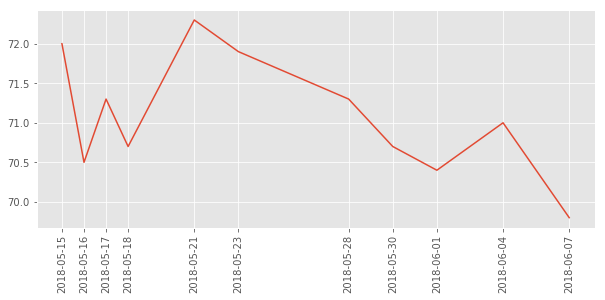

In [104]:
### 차트 ###
ser = pd.Series(df['wt'])
ser.index = pd.to_datetime(df['dt'])

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ser.index, ser)

# X축 이쁘게
ax.set_xticks(ser.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=90) 
plt.xlabel('')

plt.show()